<h1 style='text-align:center;font-size:40px'>Project: Activity Classification</h1>

- 제출기한: 2020년 2월 12일 수요일 오후 11시 59분 59초까지
- 제출방법 - 이메일 (마지막으로 제출한 파일만 사용)
  - 메일제목: `홍길동 ML project`
  - 제출할 파일: `project.py`
  - 메일주소: `hcs.lab.2019@gmail.com`

<h2>데이터</h2><br/>
<img src="example.png" width='500px'>
<div style='text-align:center'>Figure 1. Data Example (2 samples)</div><br/>
<div>1. Figure 1과 같이 손목에 달려있는 가속도계의 x, y, z축 가속도 정보를 이용하여 행동을 예측한다.</div>
<div style='text-indent:20px'>(행동은 총 12가지)</div>
<div>2. 주어진 Train Data(data/train.pkl)는 총 9명의 데이터 중 7명의 데이터이다. (총 13940개의 데이터 샘플)</div>
<div>3. 채점에 사용될 Test Data는 나머지 2명의 데이터로 채점된다. (총 5007개의 데이터 샘플)</div>
<div style='text-indent:20px;color:red'>주어진 Test data(data/test.pkl)는 실제 채점에 사용되지 않는, Train data와 완전히 동일한 데이터이다.</div>
<div>4. 각 데이터 샘플은 Subject, Data, Motion으로 이루어지고 의미는 아래와 같다.</div>
<div style='text-indent:20px'>Subject: 샘플을 수집한 실험자의 id (int) (분류할 때 predictor로 이용하지 않는다)</div>
<div style='text-indent:20px'>Data: (500, 3) Shape의 Numpy array (1초당 100개씩 5초간 x,y,z축의 가속도값을 측정)</div>
<div style='text-indent:20px'>Motion: 행동의 종류 (string, ex. 'walking')</div>
<div>5. Subject 정보는 분류에 이용되지 않는다.</div>
<div>6. Subject 정보를 이용하여 실험자별 Cross-validation을 수행할 수 있다.</div>

In [1]:
# 아래와 같은 방식으로 data를 load할 수 있다.
import pickle

with open('data/train.pkl', 'rb') as f:
    df_train = pickle.load(f)
df_train.head(3)

Subject                                               Data   Motion
0        3  [[-2.115489959716797, 2.9105000495910645, 8.15...  ironing
1        3  [[-3.5734200477600098, 3.9679501056671143, 10....  ironing
2        3  [[-1.7668700218200684, 11.98840045928955, 1.08...  ironing

In [2]:
print('Data 종류는 {}가 있습니다'.format(list(df_train.columns)))
print()

subjects, X, Y = df_train.Subject, df_train.Data, df_train.Motion
print('Subject, X, Y의 Shape는 각각 다음과 같습니다')
print('{}  {}  {}'.format(subjects.shape, X.shape, Y.shape))
print()

print('set(subjects): {}'.format(set(subjects)))
print('set(Y): {}'.format(set(Y)))
print()

print('Subject는 int, Data는 numpy.ndarray, Motion은 string 값을 가집니다')
print('type(subjects[0]): {}'.format(type(subjects[0])))
print('type(X[0]): {}'.format(type(X[0])))
print('type(Y[0]): {}'.format(type(Y[0])))
print()

print('subjects[0]: {}'.format(subjects[0]))
print('Y[0]: {}'.format(Y[0]))

Data 종류는 ['Subject', 'Data', 'Motion']가 있습니다

Subject, X, Y의 Shape는 각각 다음과 같습니다
(13940,)  (13940,)  (13940,)

set(subjects): {3, 4, 5, 6, 7, 8, 9}
set(Y): {'walking', 'Nordic walking', 'rope jumping', 'ascending stairs', 'sitting', 'standing', 'running', 'descending stairs', 'lying', 'ironing', 'vacuum cleaning', 'cycling'}

Subject는 int, Data는 numpy.ndarray, Motion은 string 값을 가집니다
type(subjects[0]): <class 'numpy.int64'>
type(X[0]): <class 'numpy.ndarray'>
type(Y[0]): <class 'numpy.str_'>

subjects[0]: 3
Y[0]: ironing


Shape X[0]: (500, 3)


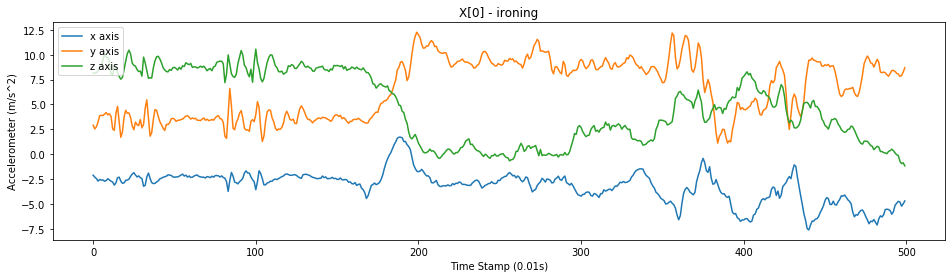

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

X_sample = X[0]
print('Shape X[0]: {}'.format(X_sample.shape))
plt.figure(figsize=(16, 4))
plt.plot(X_sample[:, 0], label='x axis')
plt.plot(X_sample[:, 1], label='y axis')
plt.plot(X_sample[:, 2], label='z axis')
plt.title('X[0] - {}'.format(Y[0]))
plt.xlabel('Time Stamp (0.01s)')
plt.ylabel('Accelerometer (m/s^2)')
plt.legend(loc='upper left')
plt.show()

## 문제
> 수정할 파일은 `project.py`이다.

1. `extract_feature` 함수를 구현해보자 [0점]
  - input: `numpy.ndarray` (shape == (500, 3))
  - output: `numpy.ndarray` (shape == (p,))
<img src="features.png" width="500px">
<br/><br/>
2. 1번에서 구한 Feature들의 차원을 줄이는 `Decomposer` 클래스를 구현해보자 [0점]
  - 함수가 아닌 클래스로 만드는 이유: Train data로 fit할 때의 정보를 Test data를 transform할 때에 이용하려면 함수보다 state를 가지는 클래스로 구현하는 것이 유리하다.
  - Linear Discriminant Analysis, Principal Component Analysis, Partial Least Squares 등의 차원 축소 기법과 Variable Selection 기법들을 이용한다.
<br/><br/><br/><br/>
3. LRClassifier (Logistic Regression), LDAClassifier (Linear Discriminant Analysis), RFClassifier (Random Forest), BClassifier (Decision Tree를 Boosting), SVMClassifier (Support Vector Machines), 총 5가지 Classifier들을 구현한다. 단, 괄호 안에 들어간 방식(Logistic Regression, Linear Discriminant Analysis, ...) 으로 분류하여야 한다. ([import문 참고](#Import)) [100점]
  - `project.py`에 예시로 KNNClassifierFunc, KNNClassifierClass 두 가지 방식으로 Classifier가 구현되어있다.
  - Pipeline을 쓰면 편하지만 Customize하기 어려울 수 있다.
  - 구현방식과 상관없이 `Evaluation.ipynb`파일이 잘 실행될 수 있도록 한다.

<h3 style='color:red'>주의사항</h3><br/>
<div>수정할 파일은 project.py이다. (다른 파일은 제출하지 않는다.)</div>
<div>채점은 Evaluation.ipynb로 이루어진다. (1, 2번은 따로 채점하지 않는다.)</div>
<div>Evaluation.ipynb는 project.py의 LRClassifier, LDAClassifier, RFClassifier, BClassifier, SVMClassifier만을 이용한다.</div>
<div style='color:red'>채점을 할 때에는 실행결과 나오는 macro f1-score와 그 결과가 나오는 과정(올바른 방식으로 분류하였는지)을 본다.</div>
<div style='color:red'>주어진 data/test.pkl 파일은 data/train.pkl과 정확히 같은 파일이다. (실제 Test에 사용되는 것과 다르다.)</div>
<div>특정 모델을 import해서 사용할 수 있다. (직접 구현해도 된다!)</div>
<div>project.py 내에 다른 함수를 선언하고, 클래스를 만드는 등 다른 코드는 필요에 따라 추가할 수 있다.</div>

<h3 style='color:red'>채점기준</h3><br/>
<div>1) 1번, 2번은 배점이 0점, 3번 배점이 100점이다.</div>
<div style='text-indent:20px'>(1번, 2번의 배점은 0점이지만 3번 문제에서 보다 높은 macro f1-score를 얻기 위해서는 올바른 구현을 하는 것이 좋다.)</div>
<div>2) 3번 (100점): Evaluation.ipynb, 제출한 project.py를 이용하여 채점된다.</div>
<div style='text-indent:20px'>A. 5가지 Classifier 각각 20점씩 배정된다.</div>
<div style='text-indent:20px'>B. 20점 = 구현(15점) + macro f1-score(5점)</div>
<div style='text-indent:20px'>C. project.py에서 3번 문제의 조건에 맞게 Classifier를 구현하면 15점</div>
<div style='text-indent:20px'>D. macro f1-score의 경우 전체 인원에 대해 표준화(standardization)하여 min~max 범위를 0~5점 범위에 대응시킨다.</div>

2)-D. ex) macro f1-score => 점수
```python
import numpy as np
from scipy import stats

example_f1_scores = [0.9, 0.8, 0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.72]
zscore = stats.zscore(example_f1_scores)
score = 5 * (zscore - np.min(zscore)) / (np.max(zscore) - np.min(zscore))
print(example_f1_scores)
print(score)
# macro f1-score 0~1: [0.9, 0.8,  0.5, 0.6,  0.65,  0.7, 0.75,  0.8,  0.72]
# score          0~5: [5.0, 3.75, 0,   1.25, 1.875, 2.5, 3.125, 3.75, 2.75]
```

---
# Test Code (will be used for scoring)
### Import

In [ ]:
import pickle
from sklearn.metrics import f1_score

from project import LRClassifier, LDAClassifier, RFClassifier, BClassifier, SVMClassifier

### Load Data

In [ ]:
with open('data/train.pkl', 'rb') as f:
    df_train = pickle.load(f)
with open('data/test.pkl', 'rb') as f: # 실제 Test에 사용될 test.pkl과 주어진 test.pkl은 다르다.
    df_test = pickle.load(f)            # 주어진 test.pkl의 경우 train.pkl과 같다.
    
X_train = df_train.Data
y_train = df_train.Motion
X_test = df_test.Data
y_test = df_test.Motion

X_train.shape, y_train.shape, X_test.shape, y_test.shape

### Evaluate

In [ ]:
for Classifier in [LRClassifier, LDAClassifier, RFClassifier, BClassifier, SVMClassifier]:
    clf = Classifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = f1_score(y_test, y_pred, average='macro')
    
    print(score)